<a href="https://colab.research.google.com/github/qsdcfd/TIL/blob/TIL/Study__234/EDA_Project_titanic_%EC%9D%B4%EC%84%B8%ED%98%84_%EC%98%A4%ED%94%84%EB%9D%BC%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 프로젝트 목적

타이타닉호의 침몰 사건은 많이 들어보셨을 겁니다. 영화로도 나올 정도로 회자가 많이 되었지요

타이타닉호는 정말 많은 사람들이 사망을 하게된 안타까운 사건인데 생존률과 관련된 것 데이터의 feature를 찾는 것이 **목표**입니다.

<br>

**방식**은 Data-driven 사고를 기반으로 데이터 로드, 데이터 탐색, EDA, 데이터 클리닝, 전처리, feature_engineering, 모델링까지 진행해볼 것입니다.

그리고, 추가적으로 머신러닝 모델을 활용하여 각 모델별 생존율 예측하는 함수를 보이고 그 함수의 예측율까지 계산해보겠습니다.

In [ ]:
#빈 코드는 문장 분리용 입니다.

### 데이터 보기 전

데이터를 보기 전 저의 생각과 가설을 설정한 것입니다.

|No. |     가설  |   내용       |     데이터 키워드     |
|----- | --------------------------------------- |:---------------:|--------------------------|
|01.| 유년기 혹은 노년기의 사람들은 생존율이 높을 것이다.    | 기본적으로 약자층이기에 구조 순위 혹은 사람들의 배려가 있을 것이다.  | 나이,생존율  | 
|02.| 비행기처럼 높은 클래스의 사람들은 생존율이 높을 것이다.    | 기본적으로 탈출점, 구조점과 가까이기에  있을 것이다.  | 배의 클래스,생존율  | 
|03.| 여자의 생존율이 높을 것이다.    | 높은 클래스같이 지리적 이점이나 사회적 배려 대상이라는 인식  | 성별, 클래스, 생존율  | 
|04.| 가족 단위가 클수록 생존하기 힘들 것 같다    | 급박한 상황에서 모든 구성원이 생존할 수 있을끼?  | 가족 구성원 데이터, 생존율  | 




## Data load

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('/content/drive/MyDrive/프로젝트오리엔테이션/titanic.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"



### 데이터 설명 및 가설 설정

Survived : 생존 여부 (종속 변수)

나머지 변수는 독립변수

<br>

#### 생존율에 미미할 데이터

Body : 각 승객의 고유 번호로 의미 없음 

Name : 이름 - 이름으로 딱히 의미가 있을까? 큰 의미 없을 듯.

Embarked : 승선한 항 - 큰 의미 없을 듯하다

Ticket : 티켓의 고유넘버 - 티켓 자체로 생존여부를 알 수는 없을 듯하다.

Home: 출신 지역이 생존율을 높일 것 같진 않습니다.

boat: 보트와 객실 위치의 거리를 판단하기엔 좋겠지만 그 데이터가 없이 번호만 있다면 티켓 넘버와 같은 속성이라고 생각하여 영향을 줄 것 같지 않습니다.


<br>

#### 영향이 있을 것 같은 것(가격)


Pclass : 티켓의 승선권 클래스 


클래스에 따라 좀 더 생존에 용이한 구조이지 않을까?

1st = Upper

2nd = Middle

3rd = Lower

Fare : 티켓의 요금 

비싼 요금의 티켓과 생존 여부에 상관이 있을 수도 있다. 하지만 Pclass에 포함되어있는 내용일 것 같다.

Cabin : 객실 번호 

어떤 객실 번호 범위는 좀 더 갑판 등의 생존에 용이한 위치에 있을 수도 있을 듯하다. 이것은 
같은 Pclass에서 생존율 차이를 보일 수 있을 것 같다








<br>

Sex : 성별 - 남자보다 여자가 생존율이 더 높을 것 같다.  성별에 따른 구출 순서로 인해서 생존에 용이할 수 있을 듯하다.

Age : 나이 - 각 세대별(10대, 20대 또는 아이, 청소년, 성인 등)로 차이가 있을 수 있다. 아마도 어린나이일수록 생존 확률이 높을 것 같다 (주변의 도움과 구출 순서 우선순위)

SibSp : 

동반한 Sibling(형제자매)와 Spouse(배우자)의 수 - 동반 여행자의 수에 따라 생존 차이가 있을 수도 있다.

구출 속도나 도움의 손길이 많을 것 같습니다.

Parch :  동반한 Parent(부모) Child(자식)의 수

SibSp 동일






### 데이터 본 후

|No. |     가설  |   내용       |     데이터 키워드     |
|----- | --------------------------------------- |:---------------:|--------------------------|
|01.| 유년기 혹은 노년기의 사람들은 생존율이 높을 것이다.    | 기본적으로 약자층이기에 구조 순위 혹은 사람들의 배려가 있을 것이다.  | 나이,생존율  | 
|02.| 비행기처럼 높은 클래스의 사람들은 생존율이 높을 것이다.    | 기본적으로 탈출점, 구조점과 가까이기에  있을 것이다.  | 배의 클래스,생존율  | 
|03.| 여자의 생존율이 높을 것이다.    | 높은 클래스같이 지리적 이점이나 사회적 배려 대상이라는 인식  | 성별, 클래스, 생존율  | 
|04.| 가족 단위가 클수록 생존하기 힘들 것 같다    | 급박한 상황에서 모든 구성원이 생존할 수 있을끼?  | 가족 구성원 데이터, 생존율  | 

<br>

가설 변화는 크게 할 것이 없었습니다. 허나 한 가지 생각이 든 것은 데이터가 단순히 이분법으로 나이-생존율 처럼만 분석하면 올바르게 분석이 안 될 것 같습니다.

<br>

왜냐하면, 데이터안의 15개 정도의 칼럼이 있고 연결 지어서 새로은 **insight**도출이 가능하다는 느낌이 들었습니다.

<br>


|No. |     생존율 영향 데이터  |   이유       |
|----- | --------------------------------------- |:---------------:|
|01.|Pclass, Sex, Age, SibSp|설정한 가설에 근간|
|02.|body,name,embarked,ticket,home.dest,boat|구조자 입장에서 직관적인 판단으로 구조 계획 설정 불가|

<br>


|     데이터 상위 집합 |   하위 집합       |
|----- | --------------------------------------- |
|Pclass|Cabin, Fare|
|Family_Size|SibSp, Parch|
|Survived|종속변수|
|All data without Survived|독립변수

### EDA

실제 데이터를 뜯어보아서 목적에 영향을 낄칠 데이터와 아닌 것을 잡는 과정입니다.

dimension 확인 ,변수별 타입 확인, 결측치 확인, 시각화를 통한 데이터 분포 확인 등 데이터에 대한 정보를 얻는 과정이기도 합니다.

그래서, 하나하나 꼼꼼하게 할 것입니다.

<br>

**이 과정을 해야 data cleaning, data preprocessing, Feature Engineering, Modeling이 가능해집니다.**


In [4]:
#데이터 타입 확인

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
#기초 통계량 확인

data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


다양한 데이터 타입이 있어서 데이터 처리 시 유의해야함

#### 결측치

지금 당장은 확인만 할 것이고 뒤에서 모델링할 때 결측치 처리를 다룰 것입니다.

단순히 삭제만 하지 않고, 평균도 이용하면서 다양하게 할 것입니다.

In [6]:
#결측치 확인
data.isnull().sum().sort_values(ascending=False)

body         1188
cabin        1014
boat          823
home.dest     564
age           263
embarked        2
fare            1
pclass          0
survived        0
name            0
sex             0
sibsp           0
parch           0
ticket          0
dtype: int64

In [7]:
#칼럼별 결측치 수는 파악이 되었으나 비율을 알고 싶습니다.
#추가적으로 dataframe형식으로 결측치 값과 비율을 출력해보겠습니다.


raw_info = pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})
raw_info = raw_info.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values(nb)'}))
raw_info = raw_info.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.rename(index={0:'null values (%)'}))

display(raw_info)
display(data[:5])

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
column type,int64,int64,object,object,float64,int64,int64,object,float64,object,object,object,float64,object
null values(nb),0,0,0,0,263,0,0,0,1,1014,2,823,1188,564
null values (%),0.0,0.0,0.0,0.0,20.091673,0.0,0.0,0.0,0.076394,77.463713,0.152788,62.872422,90.756303,43.086325


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


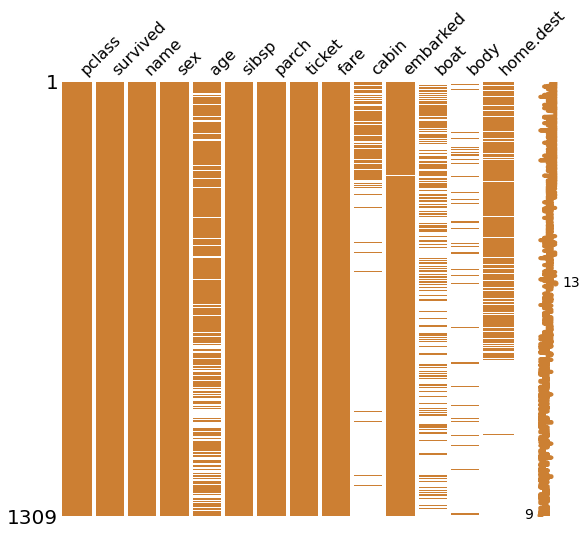

In [8]:
#결측치 시각화
msno.matrix(df=data.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

In [9]:
import pandas as pd
from pandas import Series, DataFrame
#편의를 위해서 소수점 하나만 포함해서 작성
null_values = {'null_val' : ['90.7', '77.4' ,'62.8' ,'43.0' , '20.0' ,' 0.15' ,'0.07'],
               'Name': ['body','Cabin','boat','home.dest','age','embarked','fare']}

data1 = DataFrame(null_values)
print(data1)

  null_val       Name
0     90.7       body
1     77.4      Cabin
2     62.8       boat
3     43.0  home.dest
4     20.0        age
5     0.15   embarked
6     0.07       fare


#### 결측치 분석

생각보다 결측치의 비율이 큰 부분들이 있으나 가설 설정한 내용엔 영향을 줄 것 같지 않다고 판단한 것이라서 따로 결측치 처리를 하지 않을 것입니다.

그러나, 모델링 부분에선 나이나 Cabin같이 영향을 줄 것 같은 것들은 평균치나 dropna로 설정을 할 것입니다.

<br>

간단하게 말하면, 기존 데이터를 활용해서 모델을 위한 새로운 데이터를 만들 것입니다.


#### Target label 확인

물론, 모델링을 할 것이 아니라서 중요 부분은 아니지만 항상 모델링 할 것을 염두해두고 target label은 확인해야합니다.

왜냐하면, 생존/죽음같이 이진 분류 테스크에선 0 과 1의 분포가 모델 평가를 다르게 하기 때문입니다.

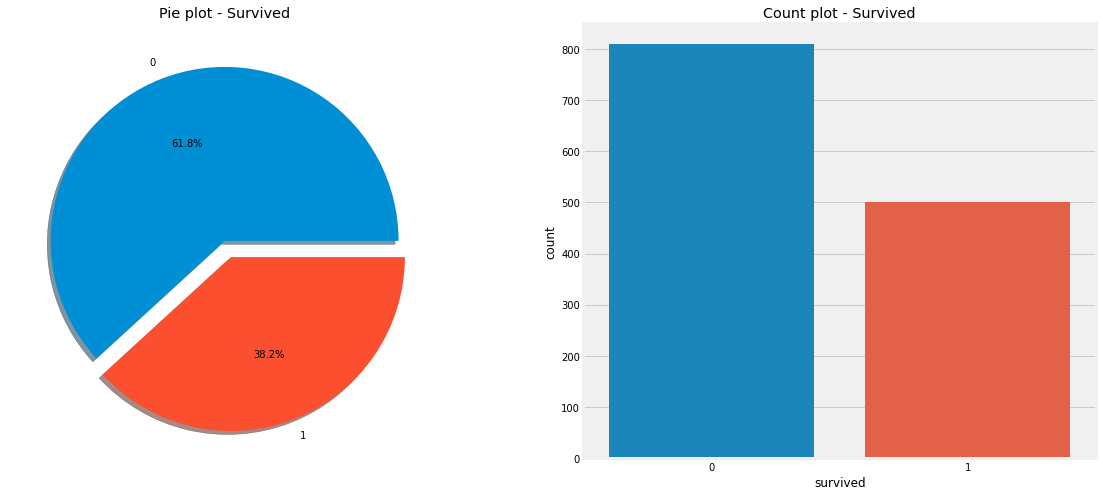

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('survived', data=data, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()


죽은 사람이 꽤 있으나 38.4 % 가 살아남았습니다.

이정도면, target label 의 분포가 제법 균일(balanced)합니다. 

불균형이어서 원하는 결과를 체크하지 못하는 불상사는 벌어지지 않을 것 같습니다.

### EDA 시작



#### Pclass

Pclass 는 ordinal, 서수형 데이터로 카테고리이면서, 순서가 있는 데이터 타입입니다.

먼저 Pclass 에 따른 생존률의 차이 봅니다

'Pclass', 'Survived' 를 가져온 후, pclass 로 묶은 후에 각 pclass 마다 0, 1 이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나옵니다


각 class 에 몇명이 있는 지 확인할 수 있으며, sum() 을 하면,생존한(survived=1)사람의 총합을 주게 됩니다

In [11]:
#객실 인원
people = data[['pclass', 'survived']].groupby(['pclass'], as_index=True).count()
people

,survived
pclass,
1,323
2,277
3,709


In [12]:
#생존인원
survived_people = data[['pclass', 'survived']].groupby(['pclass'], as_index=True).sum()
survived_people

,survived
pclass,
1,200
2,119
3,181


In [13]:
#사망 승객 수
died_people = data[['pclass', 'survived']].groupby(['pclass'], as_index=True).count() - data[['pclass', 'survived']].groupby(['pclass'], as_index=True).sum()
died_people

,survived
pclass,
1,123
2,158
3,528


In [14]:
#사망 승객 비율
died_per = (data[['pclass', 'survived']].groupby(['pclass'], as_index=True).count() - data[['pclass', 'survived']].groupby(['pclass'], as_index=True).sum())/100
died_per

,survived
pclass,
1,1.23
2,1.58
3,5.28


In [15]:
#간단한 정리
pd.crosstab(data['pclass'], data['survived'], margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


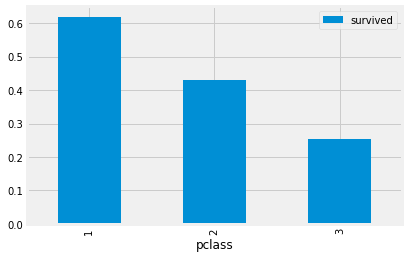

In [16]:
#시각화
data[['pclass', 'survived']].groupby(['pclass'], as_index=True).mean().sort_values(by='survived', ascending=False).plot.bar()

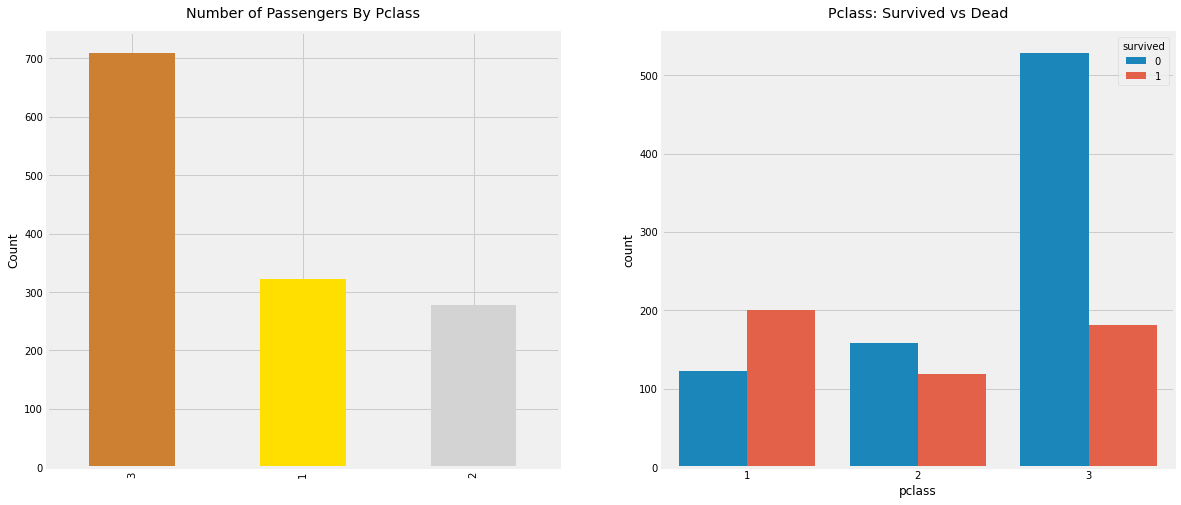

In [17]:
#왼쪽에 클래스별 탑승객 , 오른쪽은 클래스별 생존자와 사망자
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('pclass', hue='survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

클래스가 높을 수록, 생존 확률이 높은걸 확인할 수 있습니다.  

생존율에 Pclass가 큰 영향을 미칠 것 같으니 모델링 설정 시 feature engineering를 주의깊게 해야할 부분입니다.

왜 클래스의 생존율이 높을까요? 혹시 근처에 보트의 갯수가 많았을까요?

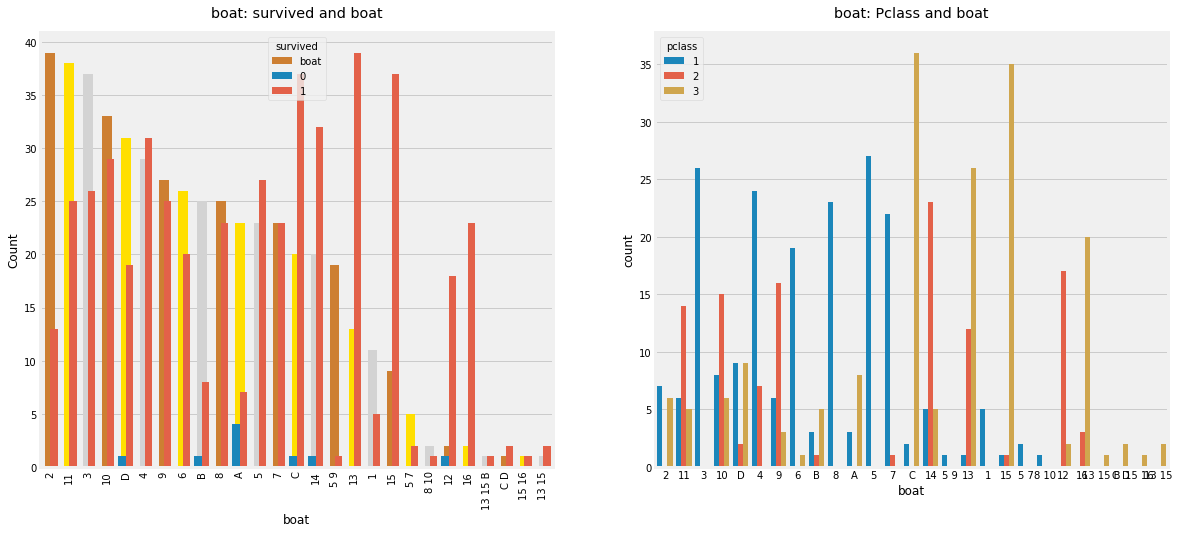

In [15]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['boat'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
sns.countplot('boat', hue='survived', data=data, ax=ax[0])
ax[0].set_title('boat: survived and boat', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('boat', hue='pclass', data=data, ax=ax[1])
ax[1].set_title('boat: Pclass and boat', y=y_position)
plt.show()

In [21]:
boats = data[['pclass', 'boat']].groupby(['pclass'], as_index=True).count()
boats

,boat
pclass,
1,201
2,112
3,173


물론 승객 수의 편차로 인해서 단순하게 pclass에 있는 보트 수로만 정의할 순 없지만 그래도 가설을 세우자면, 보트 수가 많을수록 생존자는 많아지는 것 같습니다.

Pclass1 > Pclass3> Pclass2

boat1> bpat3> boat2

### Sex

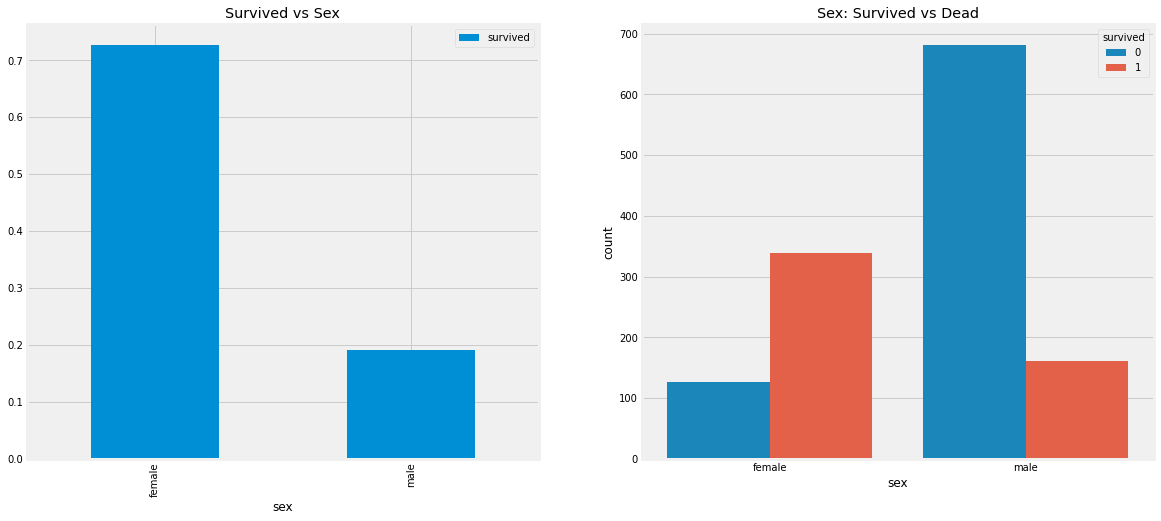

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['sex', 'survived']].groupby(['sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('sex', hue='survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [18]:
pd.crosstab(data['sex'], data['survived'], margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
sex,,,
female,127,339,466
male,682,161,843
All,809,500,1309


예상대로 여성의 생존율이 더 높군요

이 또한 생존율에 영향을 미치므로 feature engineering를 할 때 필요합니다.

혹시 보트 탑승자에 여성이 더 많았던 것은 아닐까?



In [22]:
boats = data[['sex', 'boat']].groupby(['sex'], as_index=True).count()
boats

,boat
sex,
female,319
male,167


실제로 여성이 약 1.8배 정도 보트 탑승객이 많아서 생존율이 높았고 pclass에서 비슷한 양상을 보였기에  이 boat데이터는 구명 데이터 인 것 같습니다.

제가 가설 설정할 때 생각하지 못한 부분을 발견한 것 같습니다.

#### Both Sex and Pclass

성별과 객실의 클래스를 이용하여 생존율을 살펴봅시다.

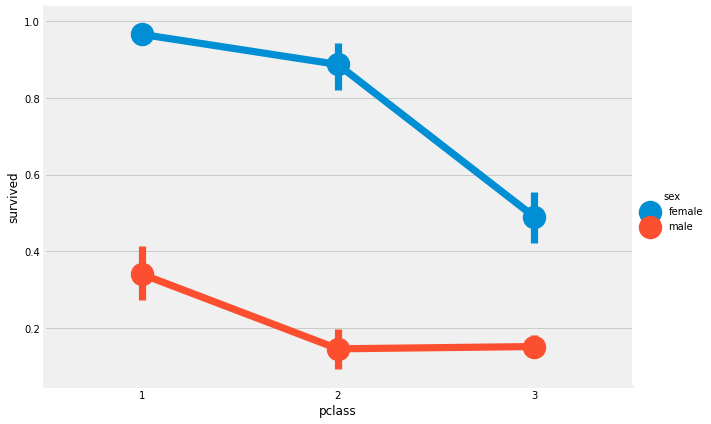

In [19]:
sns.factorplot('pclass', 'survived', hue='sex', data=data, 
               size=6, aspect=1.5)

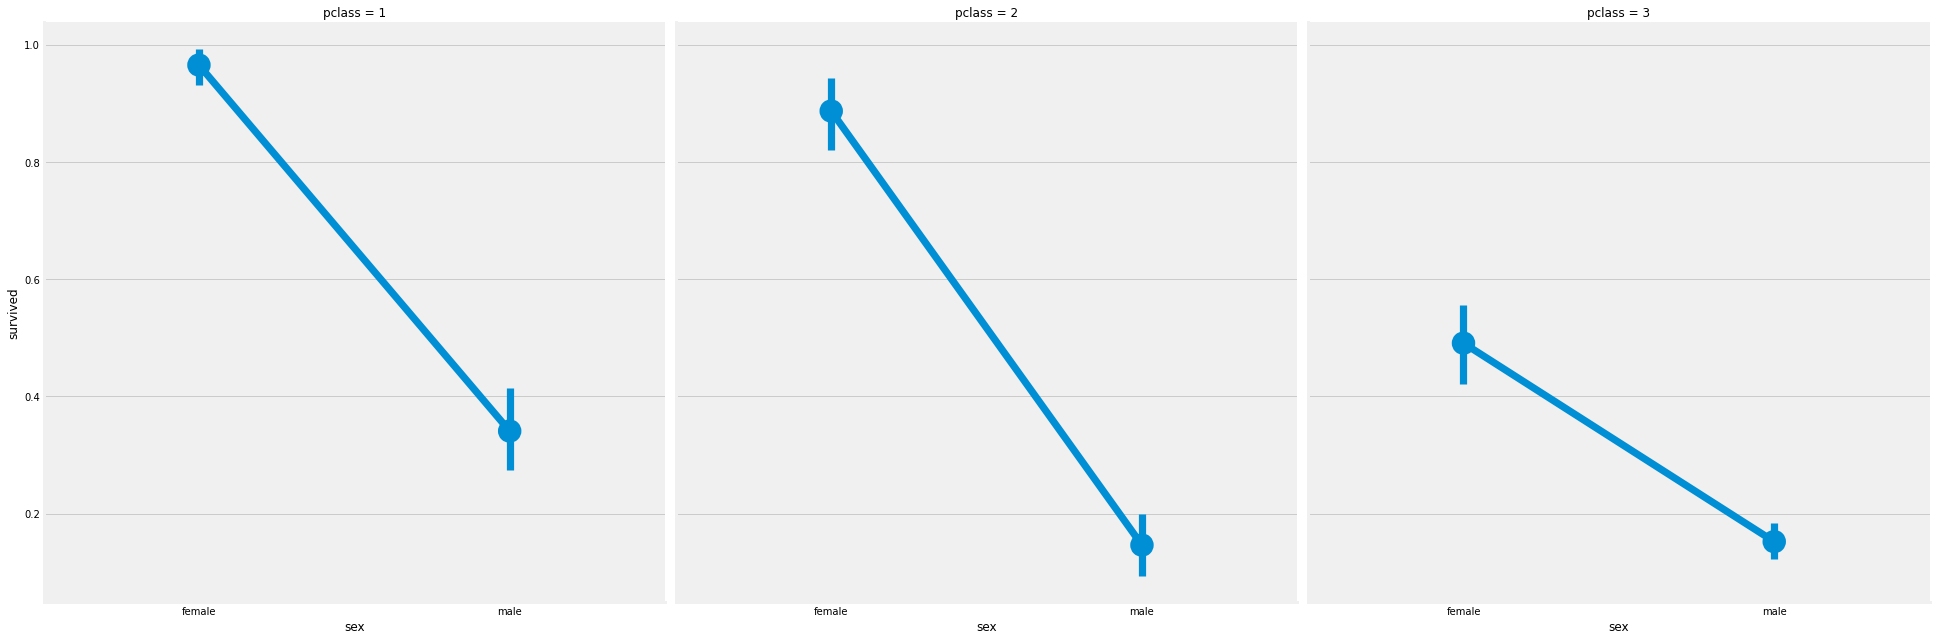

In [20]:
sns.factorplot(x='sex', y='survived', col='pclass',
              data=data, satureation=.5,
               size=9, aspect=1
              )

모든 클래스에서 female 이 살 확률이 male 보다 높은 걸 알 수 있습니다.


또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률 높습니다.

#### Age

In [22]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(data['age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(data['age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(data['age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.2 Years
탑승객 평균 나이 : 29.9 Years


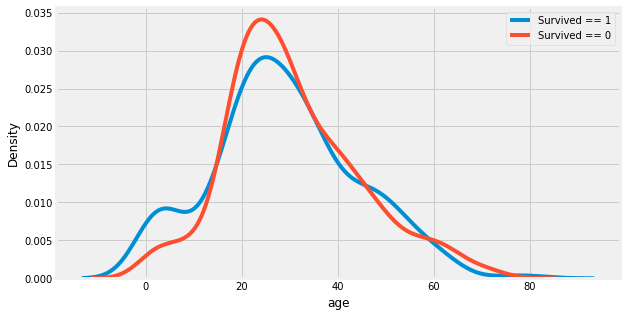

In [23]:
#히스토그램 시각화

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(data[data['survived'] == 1]['age'], ax=ax)
sns.kdeplot(data[data['survived'] == 0]['age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

확실히 나이가 어릴 수록 생존율이 높군요


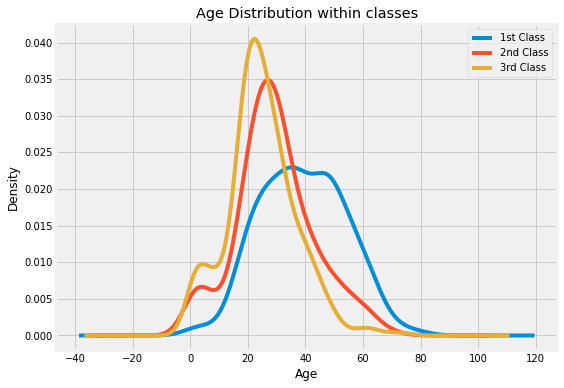

In [24]:
#나이와 객실

plt.figure(figsize=(8, 6))
data['age'][data['pclass'] == 1].plot(kind='kde')
data['age'][data['pclass'] == 2].plot(kind='kde')
data['age'][data['pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

Class 가 높을 수록 나이 많은 사람의 비중이 커지므로
나이대가 변하면서 생존률이 어떻게 되는 지 보려고 합니다.

나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 확인하겠습니다

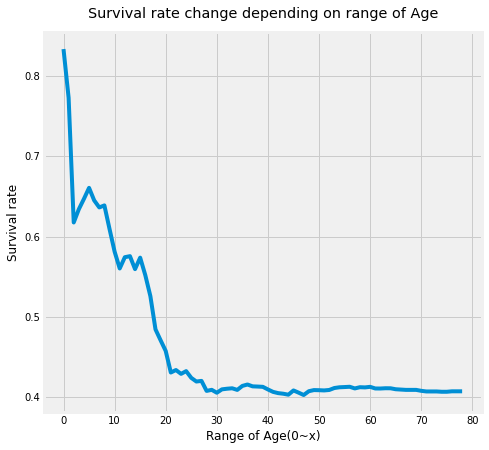

In [25]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(data[data['age'] < i]['survived'].sum() / len(data[data['age'] < i]['survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

확실히 어릴 수록 생존확률이 높다는 것을 알 수 있으므로 이 정보 또한 feature engineering에 중요할 것 같습니다


#### 지금까지 분석한 Pclass, Sex, Age

모두 그래프 시각화를 통해서 그려보겠습니다.

x축은 case:Pclass, Sex

y축은 Age입니다

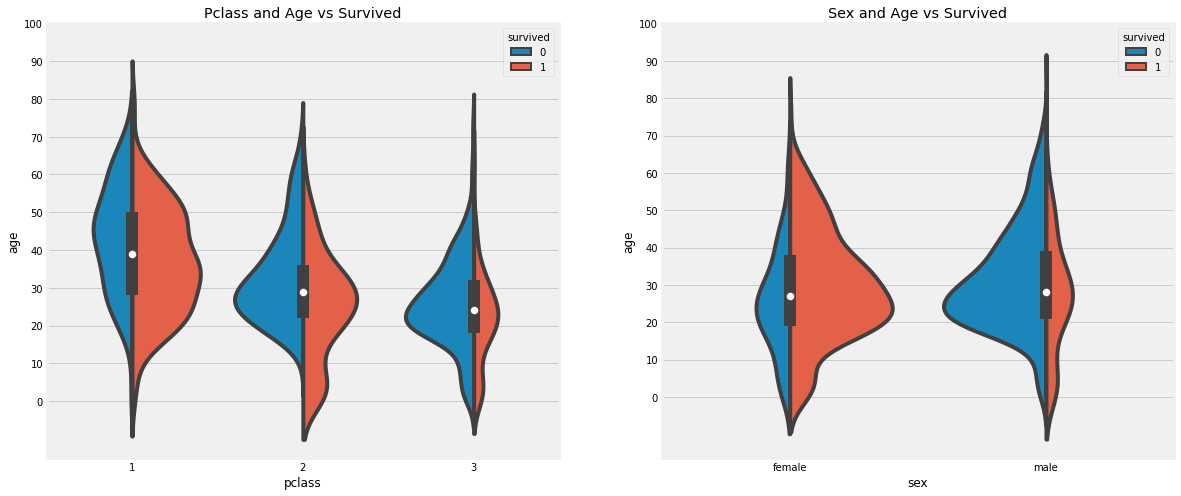

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("pclass","age", hue="survived", data=data, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("sex","age", hue="survived", data=data, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있습니다.

오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한것을 볼 수 있습니다.

여성과 아이를 먼저 챙긴 것을 볼 수 있습니다.

#### Embarked




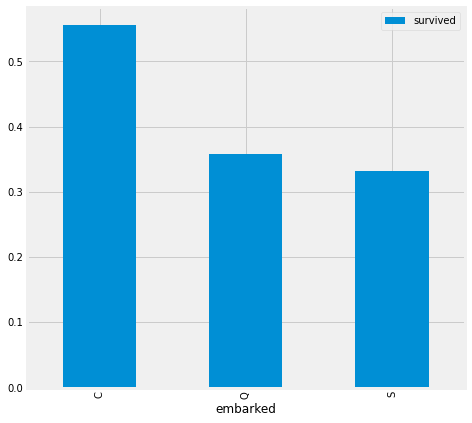

In [27]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
data[['embarked', 'survived']].groupby(['embarked'], as_index=True).mean().sort_values(by='survived', ascending=False).plot.bar(ax=ax)


생존율은 C가 제일 높으나 엄청 큰 영향을 주는지 모르겠습니다. 그러나 이 차이가 왜 나는지는 궁금해서 좀 더 시각화를 진행하겠습니다.

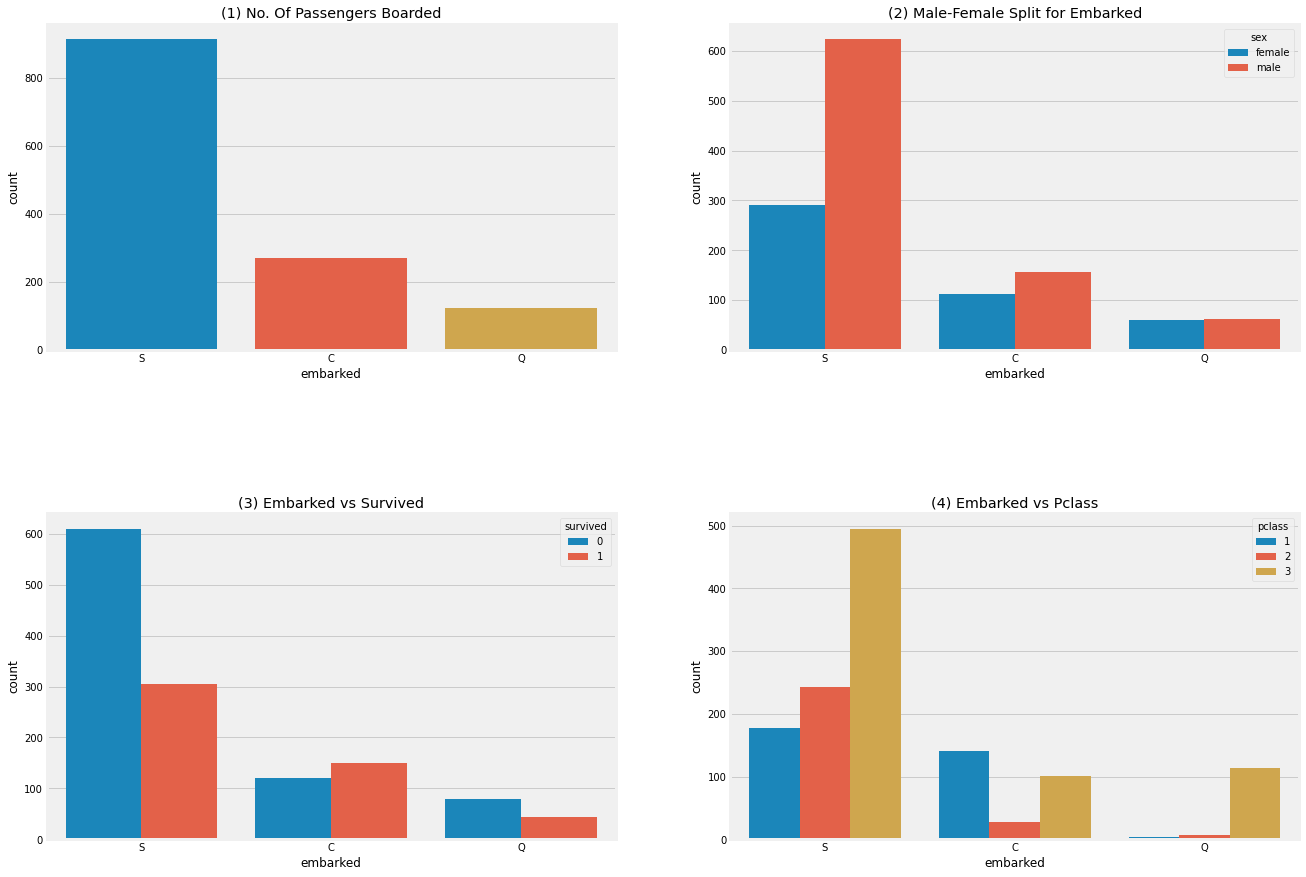

In [28]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('embarked', hue='sex', data=data, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('embarked', hue='survived', data=data, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('embarked', hue='pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승했습니다.

Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.

Figure(3) - 생존확률이 S 경우 많이 낮은 걸 볼 수 있습니다. 

Figure(4) - Class 로 split 해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그런 같습니다.

그래서, S는 3rd class 가 많아서 생존확률이 낮게 나옵니다.

결론적으론 S는 남성과 pclass 3인 사람들이 많이 탔고

C는 여성과 pclass1인 사람들이 많이 탔습니다.

이것이 결정적인 이유 같습니다.

#### Family - SibSp(형제 자매) , Parch(부모, 자녀)

형제, 자매, 부모, 자녀 속성은 하나의 가족 단위로 볼 수 있기에 한 번에 처리하겠습니다.

In [29]:
data['FamilySize'] = data['sibsp'] + data['parch'] + 1 # 자신을 포함해야하니 1을 더합니다


In [30]:
print("Maximum size of Family: ", data['FamilySize'].max())
print("Minimum size of Family: ", data['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


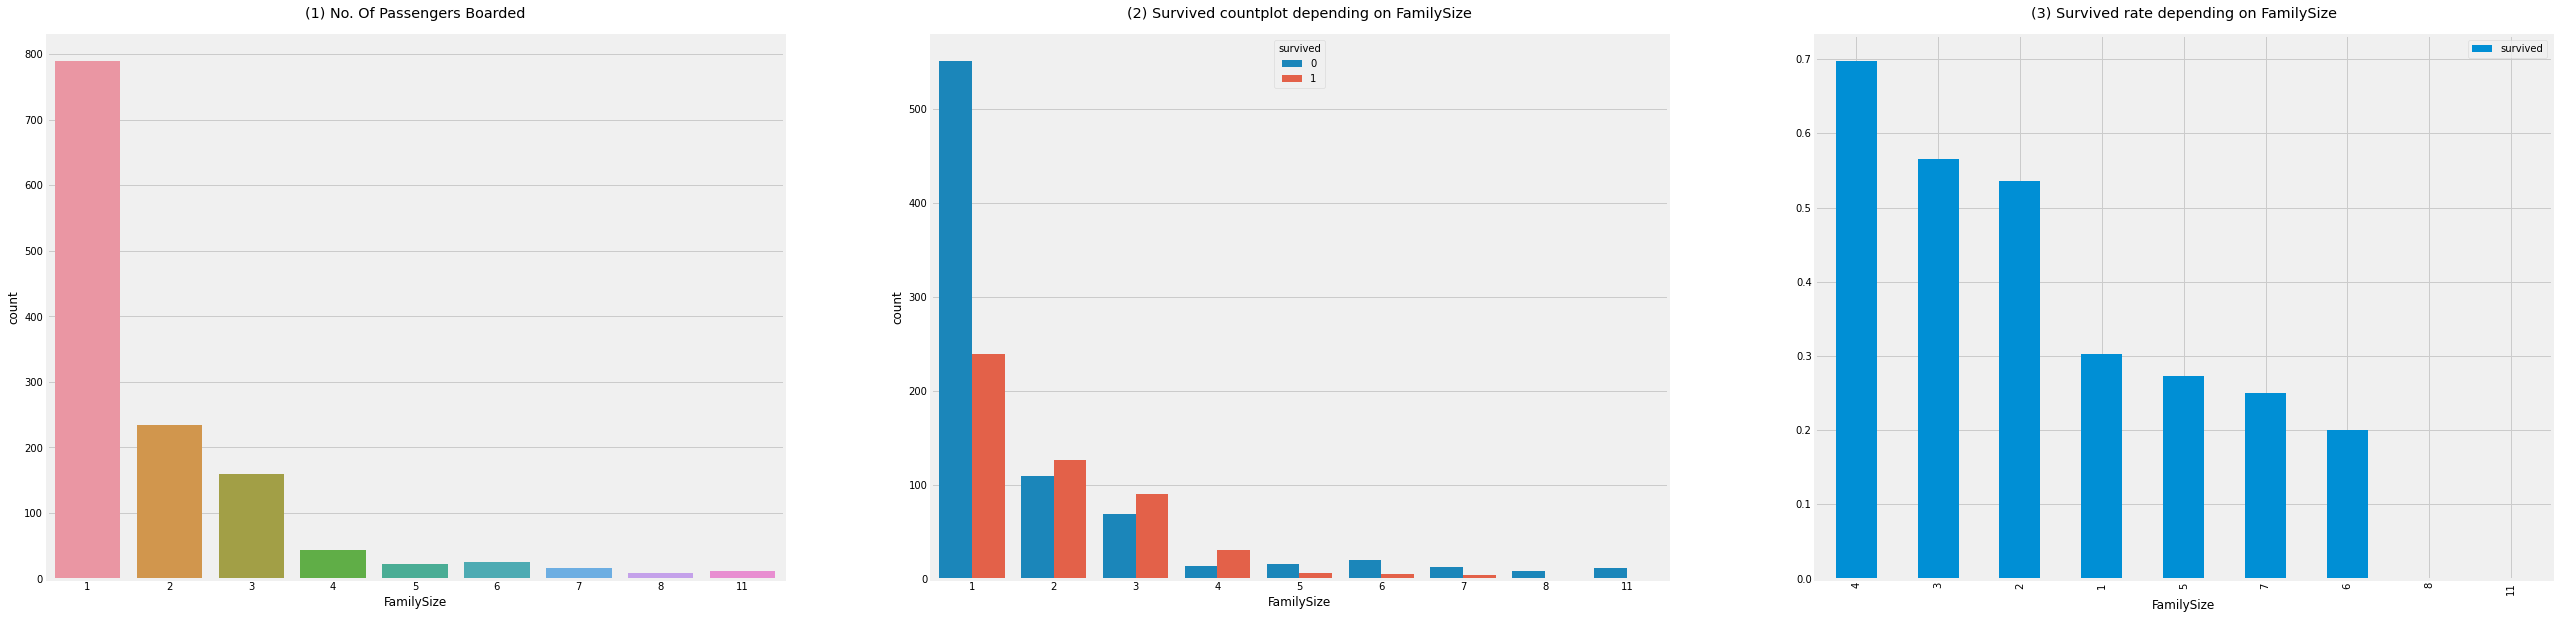

In [31]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=data, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='survived', data=data, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

data[['FamilySize', 'survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음으로 2, 3, 4명입니다.


Figure (2), (3) - 가족 크기에 따른 생존비교입니다. 가족이 4명인 경우가 가장 생존확률이 높습니다.

가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아집니다. 아마도 챙겨야할 숫자가 많기에 다 생존이 쉽지 않을 것 같습니다

 가족수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작습니다.
 
따라서, 3~4명 선에서 생존확률이 높은 걸 확인할 수 있습니다.

#### Fare

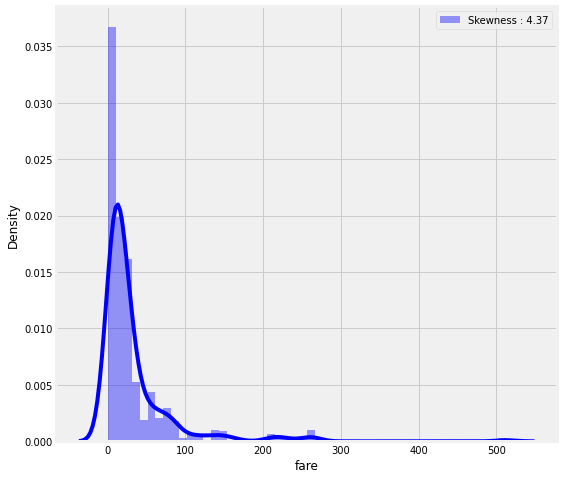

In [32]:

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(data['fare'], color='b', label='Skewness : {:.2f}'.format(data['fare'].skew()), ax=ax)
g = g.legend(loc='best')

distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness).
 
몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.


outlier의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.



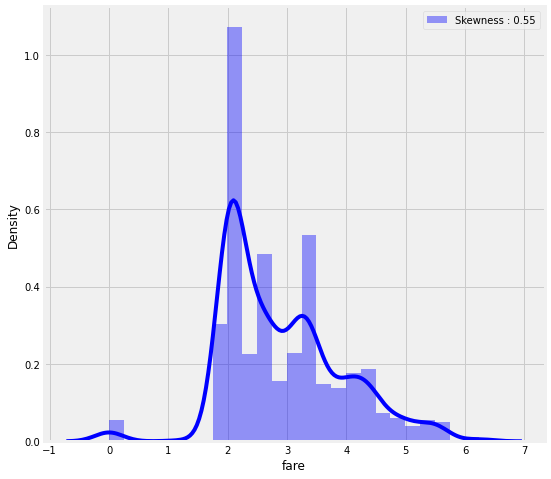

In [33]:

data['fare'] = data['fare'].map(lambda i: np.log(i) if i > 0 else 0)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(data['fare'], color='b', label='Skewness : {:.2f}'.format(data['fare'].skew()), ax=ax)
g = g.legend(loc='best')

log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.

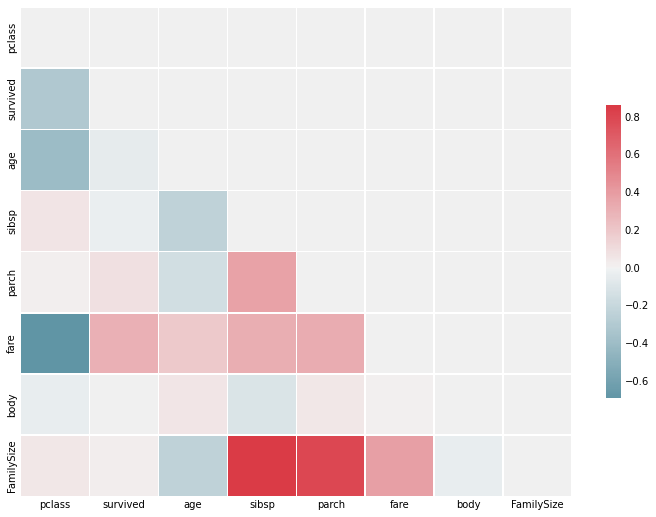

In [34]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            linewidths=.5, cbar_kws={"shrink": .6});

In [35]:
data['ticket'].value_counts()

CA. 2343    11
1601         8
CA 2144      8
PC 17608     7
347077       7
            ..
373450       1
2223         1
350046       1
3101281      1
315082       1
Name: ticket, Length: 929, dtype: int64

#### 정리

참고로, 결측치가 많은 body, cabin, boat, home.dest는 EDA를 하지 않았습니다.

결측치가 많기에 생존에 영향을 주는 유의미한 결과를 뽑아낼 수 없다고 판단했기 때문입니다.

     90.7       body
     77.4      Cabin
     62.8       boat
     43.0  home.dest


class도 나이도 성별도 다 생존율과 영향성이 있습니다. 왜냐하면, 구명 보트에 탈 확률이 높기 때문입니다.

즉, 직관적인 데이터가 결국 구명 보트 탑승객을 결정하기에 가장 생존율과 직결되는 경향성을 보이지 않나 싶습니다.

### Feature Engineering


이제부터는 저의 취미생활로 여러 코드를 적용해보는 과정을 거치겠습니다.

위의 내용을 기반으로

**설명변수들의 분류에 따른 종속변수의 차이**

**모델링**

할 것입니다.

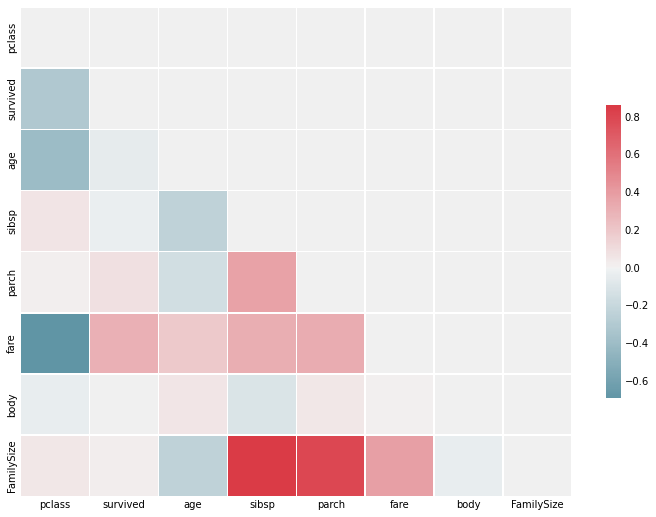

In [36]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            linewidths=.5, cbar_kws={"shrink": .6});


In [37]:
data[['pclass', 'survived', 'age']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived,age
0,1,0.619195,39.159930
1,2,0.429603,29.506705
2,3,0.255289,24.816367


In [38]:
data.pivot_table('survived', index='sex', columns='pclass')

pclass,1,2,3
sex,,,
female,0.965278,0.886792,0.490741
male,0.340782,0.146199,0.152130


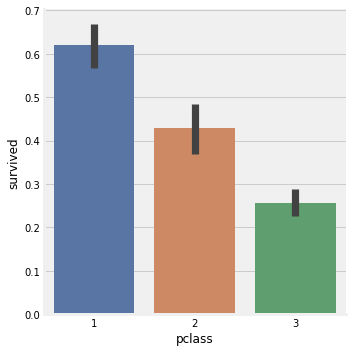

In [39]:
grid = sns.FacetGrid(data, size=5)
grid.map(sns.barplot, 'pclass', 'survived', palette='deep', order=[1,2,3]);

In [40]:
data[['sex', 'survived']].groupby('sex', as_index=False).mean().sort_values(by='sex', ascending=False)

,sex,survived
1,male,0.190985
0,female,0.727468


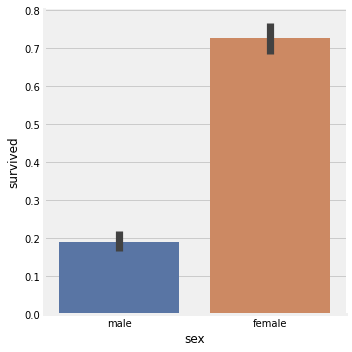

In [41]:
grid = sns.FacetGrid(data, size=5)
grid.map(sns.barplot, 'sex', 'survived', order=['male','female'], palette='deep');

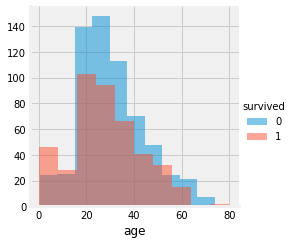

In [42]:
grid = sns.FacetGrid(data, hue='survived', size=3.5)
grid.map(plt.hist, 'age', alpha=.5)
grid.add_legend();

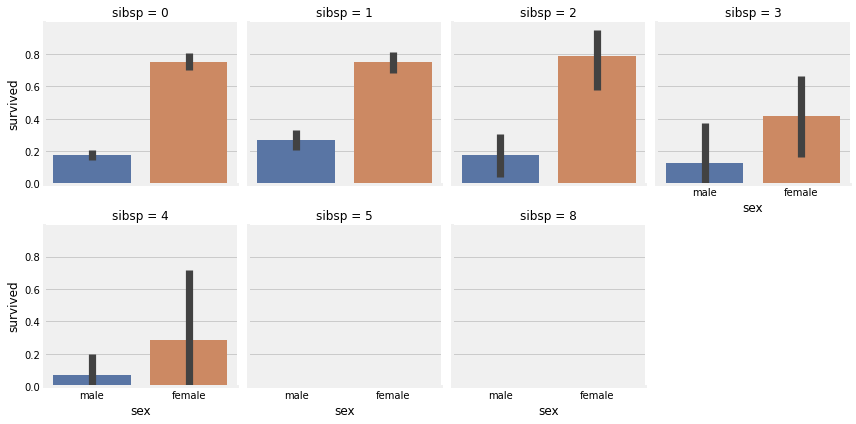

In [43]:
grid = sns.FacetGrid(data, col='sibsp', col_wrap=4, size = 3)
grid.map(sns.barplot, 'sex', 'survived', order=['male','female'], palette='deep');

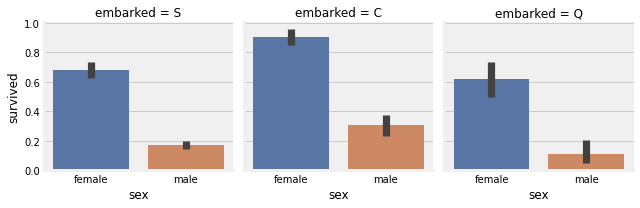

In [44]:
grid = sns.FacetGrid(data, col='embarked', size = 3)
grid.map(sns.barplot, 'sex', 'survived', palette='deep', order=['female','male']);

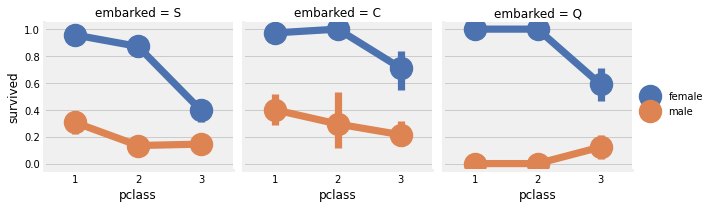

In [45]:
import seaborn as sns
grid = sns.FacetGrid(data, col='embarked')
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', order=[1,2,3], hue_order=['female','male'], palette='deep')
grid.add_legend();

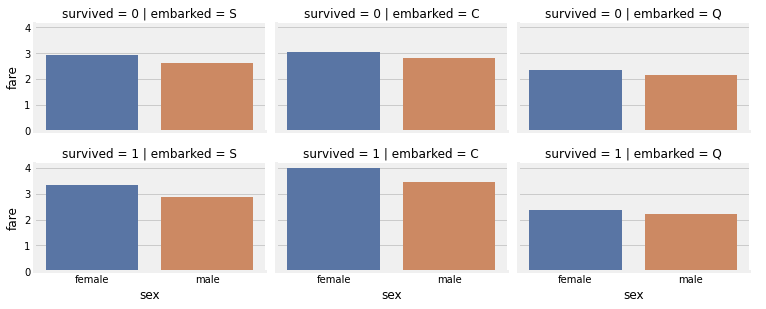

In [46]:
grid = sns.FacetGrid(data, row="survived", col='embarked', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'sex', 'fare', ci=None, palette='deep')
grid.add_legend()

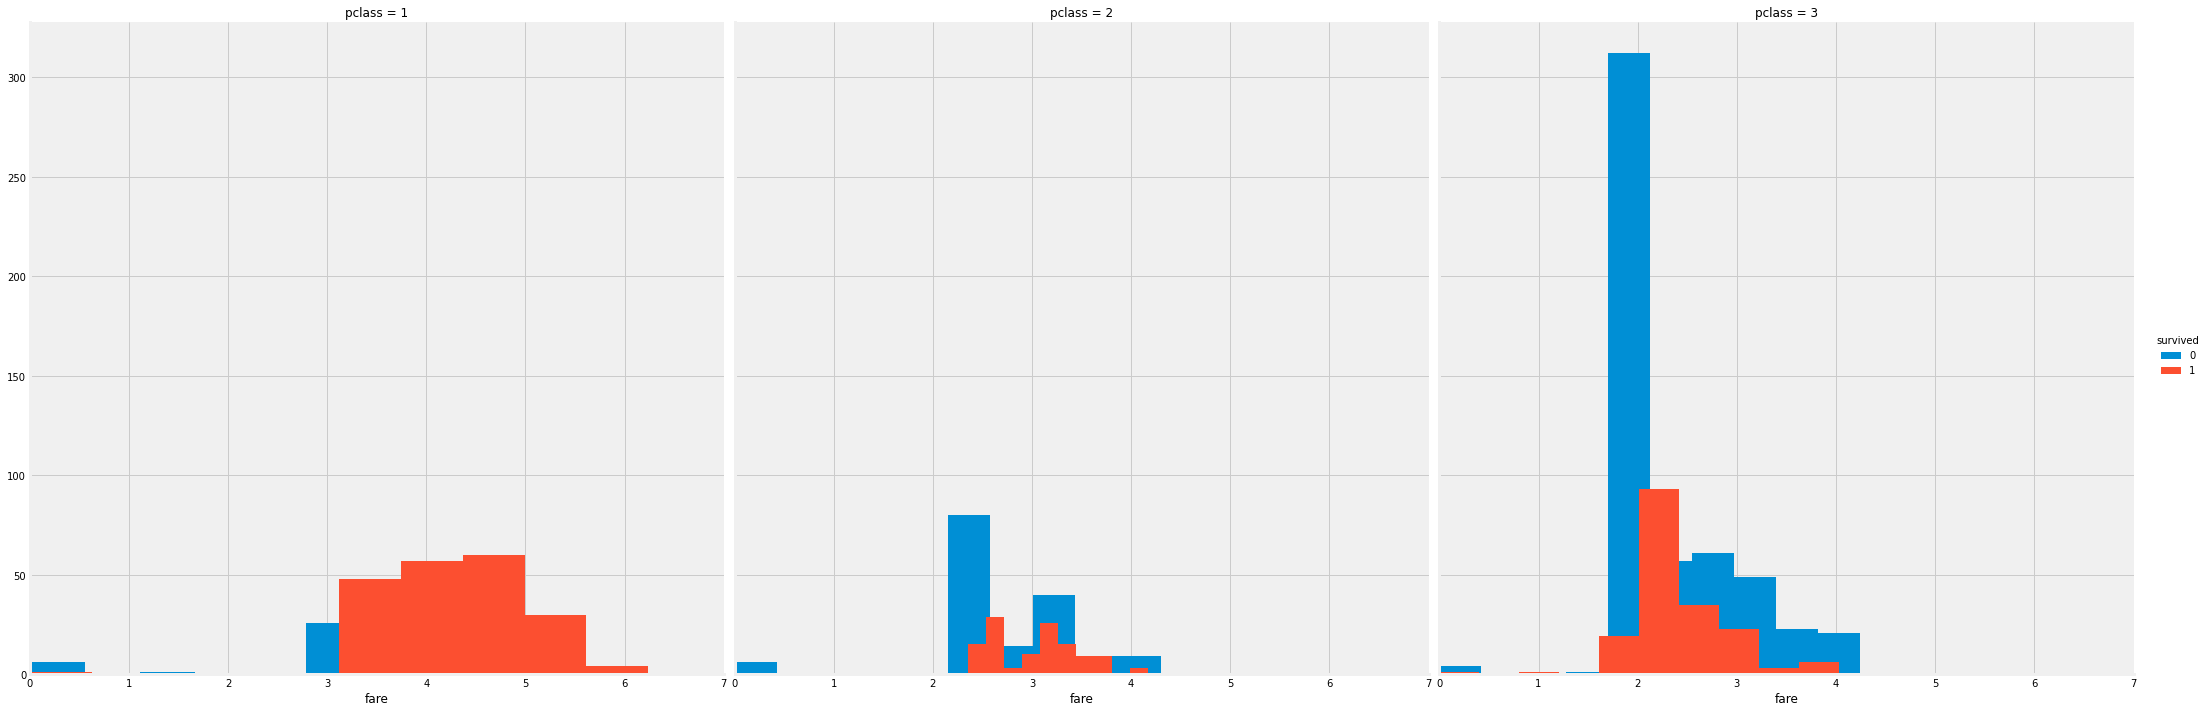

In [70]:
grid = sns.FacetGrid(data, col="pclass", hue="survived", size=10)
grid.map(plt.hist, "fare", alpha=1.0)
plt.xlim(0,7)
grid.add_legend();

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   name        1309 non-null   object 
 3   sex         1309 non-null   object 
 4   age         1046 non-null   float64
 5   sibsp       1309 non-null   int64  
 6   parch       1309 non-null   int64  
 7   ticket      1309 non-null   object 
 8   fare        1309 non-null   float64
 9   cabin       295 non-null    object 
 10  embarked    1307 non-null   object 
 11  boat        486 non-null    object 
 12  body        121 non-null    float64
 13  home.dest   745 non-null    object 
 14  FamilySize  1309 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


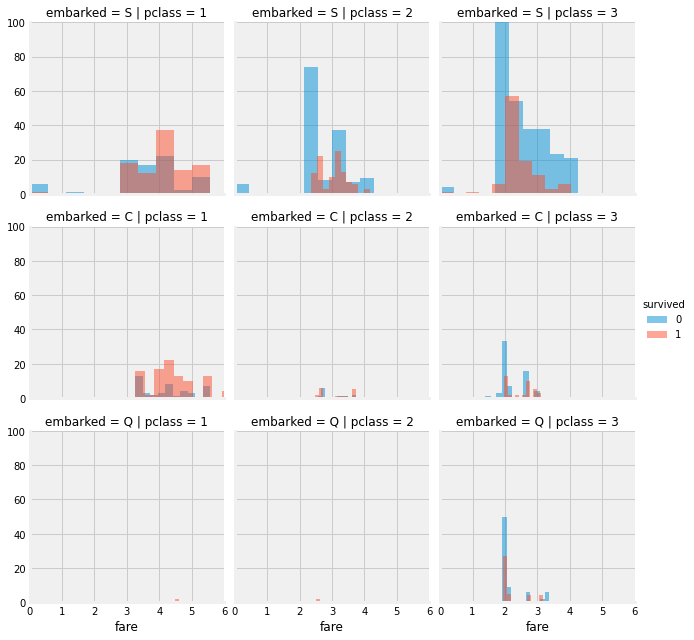

In [68]:
grid = sns.FacetGrid(data, col="pclass", row="embarked", hue="survived", size=3)
grid.map(plt.hist, "fare", alpha=.5)
plt.xlim(0,6)
plt.ylim(0,100)
grid.add_legend();
#fare최댓값이 52

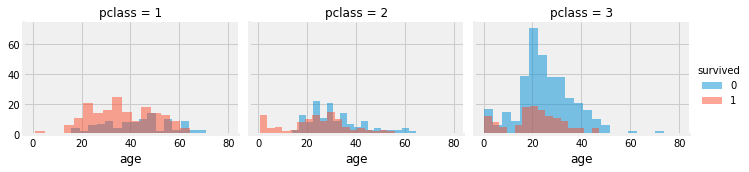

In [49]:
grid = sns.FacetGrid(data, col="pclass", hue="survived", size=2.5, aspect=1.3)
grid.map(plt.hist, "age", bins=20, alpha=0.5)
grid.add_legend();

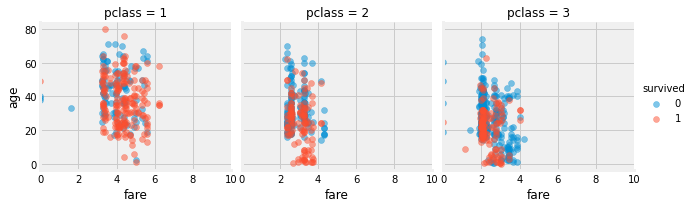

In [50]:
grid = sns.FacetGrid(data, col="pclass", hue="survived", size=3)
grid.map(plt.scatter, "fare", "age", alpha=.5)
plt.xlim(0,10)
grid.add_legend();

### Modeling을 위한 작업


Pclass, Sex, Age, SibSp, Parch, Fare, Embarked 변수의 경우 실제로 종속변수인 Survived에 영향을 끼칩니다

몇몇 변수들끼리 서로 강한 상관관계를 가지고 있어서 변수들 간의 결합(차원 축소)이 가능힐 것 같습니다.

(추가적으로 차원 축소를 해볼 것입니다.)

Ticket과 Cabin 변수는 영향력을 찾기 어려웠기 때문에 제거할 겁니다.

Age, Fare와 같은 numerical variable은 머신러닝을 위해 임의의 구간으로 잘라서 categorical 변수로 변환할 것입니다.

In [51]:
print('Ticket unique value  : {0}'.format(len(data['ticket'].unique())))
print('Cabin unique value : {0}   Cabin null값 : {1}'
      .format(len(data['cabin'].unique()), sum(data['cabin'].isnull())))


Ticket unique value  : 929
Cabin unique value : 187   Cabin null값 : 1014


In [52]:
# 영향력이 없는 변수인 Ticket, Cabin 변수 삭제
data_test = data.drop(["ticket", "cabin"], axis=1)

combine = [data_test]

print("Before : ", data.shape)
print("After  : ", data_test.shape)

Before :  (1309, 15)
After  :  (1309, 13)


In [53]:
for dataset in combine:
    dataset.sex = dataset.sex.map({'female':1,'male':0}).astype(int)

data_test.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest,FamilySize
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,5.353456,S,2,NaN,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,5.020916,S,11,NaN,"Montreal, PQ / Chesterville, ON",4
2,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,5.020916,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,5.020916,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,5.020916,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4


In [54]:
for dataset in combine:
    for i in range(2):
        for j in range(3):
            temp = (dataset.sex == i) & (dataset['pclass'] == j+1)
            dataset.loc[temp,'age'] = dataset.loc[temp,'age']. \
            where(pd.notnull(dataset[temp].age),(dataset[temp].age.median()/0.5 + 0.5) * 0.5)
    dataset.age = dataset.age.astype(int)

data_test.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest,FamilySize
0,1,1,"Allen, Miss. Elisabeth Walton",1,29,0,0,5.353456,S,2,NaN,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",0,0,1,2,5.020916,S,11,NaN,"Montreal, PQ / Chesterville, ON",4
2,1,0,"Allison, Miss. Helen Loraine",1,2,1,2,5.020916,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30,1,2,5.020916,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25,1,2,5.020916,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4


In [55]:
for dataset in combine:
    dataset.loc[dataset.age <= 16, 'age'] = 0
    dataset.loc[(dataset.age > 16) & (dataset.age <= 32), 'age'] = 1
    dataset.loc[(dataset.age > 32) & (dataset.age <= 48), 'age'] = 2
    dataset.loc[(dataset.age > 48) & (dataset.age <= 64), 'age'] = 3
    dataset.loc[dataset.age > 64, 'age'] = 4

data_test.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest,FamilySize
0,1,1,"Allen, Miss. Elisabeth Walton",1,1,0,0,5.353456,S,2,NaN,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",0,0,1,2,5.020916,S,11,NaN,"Montreal, PQ / Chesterville, ON",4
2,1,0,"Allison, Miss. Helen Loraine",1,0,1,2,5.020916,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,1,1,2,5.020916,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,1,1,2,5.020916,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4


In [56]:
for dataset in combine:
    dataset['FamilySize'] = dataset['sibsp'] + dataset['parch'] + 1

data_test[['FamilySize','survived']].groupby('FamilySize', as_index=False).mean().sort_values(by='survived',ascending=False)

,FamilySize,survived
3,4,0.697674
2,3,0.566038
1,2,0.536170
0,1,0.302532
4,5,0.272727
6,7,0.250000
5,6,0.200000
7,8,0.000000
8,11,0.000000


In [57]:
for dataset in combine:
    dataset['isAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'isAlone'] = 1

data_test[['isAlone', 'survived']].groupby('isAlone', as_index = False).mean()

,isAlone,survived
0,0,0.502890
1,1,0.302532


In [58]:
#가족 단위와 혼자를 만들었기에 이 부분은 필요가 없습니다.
data_test = data_test.drop(['parch', 'sibsp'], axis=1)

combine = [data_test]

data_test.head()

,pclass,survived,name,sex,age,fare,embarked,boat,body,home.dest,FamilySize,isAlone
0,1,1,"Allen, Miss. Elisabeth Walton",1,1,5.353456,S,2,NaN,"St Louis, MO",1,1
1,1,1,"Allison, Master. Hudson Trevor",0,0,5.020916,S,11,NaN,"Montreal, PQ / Chesterville, ON",4,0
2,1,0,"Allison, Miss. Helen Loraine",1,0,5.020916,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,1,5.020916,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,1,5.020916,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,0


In [59]:
for dataset in combine:
    dataset['Age*Pclass'] = dataset.age * dataset.pclass

data_test[['Age*Pclass', 'survived']].groupby('Age*Pclass', as_index=False).mean().sort_values(by='survived', ascending = False)

,Age*Pclass,survived
1,1,0.704545
0,0,0.552239
2,2,0.490066
4,4,0.361111
3,3,0.290657
5,6,0.176471
7,9,0.090909
6,8,0.000000
8,12,0.000000


In [60]:
data_test[['Age*Pclass','survived']].groupby('Age*Pclass').count()

,survived
Age*Pclass,
0,134
1,88
2,302
3,578
4,72
6,119
8,2
9,11
12,3


In [61]:
for dataset in combine:
    dataset['embarked'] = dataset['embarked'].fillna(data_test.embarked.dropna().mode()[0])
    
data_test[['embarked','survived']].groupby('embarked', as_index=False).mean().sort_values(by='survived', ascending=False)

,embarked,survived
0,C,0.555556
1,Q,0.357724
2,S,0.334061


In [62]:
for dataset in combine:
    dataset['embarked'] = dataset['embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

data_test.head()

,pclass,survived,name,sex,age,fare,embarked,boat,body,home.dest,FamilySize,isAlone,Age*Pclass
0,1,1,"Allen, Miss. Elisabeth Walton",1,1,5.353456,0,2,NaN,"St Louis, MO",1,1,1
1,1,1,"Allison, Master. Hudson Trevor",0,0,5.020916,0,11,NaN,"Montreal, PQ / Chesterville, ON",4,0,0
2,1,0,"Allison, Miss. Helen Loraine",1,0,5.020916,0,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,1,5.020916,0,NaN,135.0,"Montreal, PQ / Chesterville, ON",4,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,1,5.020916,0,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,0,1


In [63]:
print(data_test.fare.isnull().sum())

0


In [64]:
data_test['Fareband'] = pd.qcut(data_test['fare'], 4)
data_test[['Fareband','survived']].groupby('Fareband').mean().sort_values(by='survived', ascending=False)

,survived
Fareband,
"(3.443, 6.239]",0.585139
"(2.671, 3.443]",0.435976
"(2.066, 2.671]",0.284375
"(-0.001, 2.066]",0.227811


In [65]:
for dataset in combine:
    dataset.loc[ dataset['fare'] <= 2.066, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 2.066) & (dataset['fare'] <= 2.671), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 2.671) & (dataset['fare'] <= 3.443), 'fare'] = 2
    dataset.loc[ dataset['fare'] > 3.443, 'fare'] = 3
    dataset['fare'] = dataset['fare'].astype(int)
data_test = data_test.drop('Fareband', axis=1)
combine = [data_test]

data_test.head(10)

,pclass,survived,name,sex,age,fare,embarked,boat,body,home.dest,FamilySize,isAlone,Age*Pclass
0,1,1,"Allen, Miss. Elisabeth Walton",1,1,3,0,2,NaN,"St Louis, MO",1,1,1
1,1,1,"Allison, Master. Hudson Trevor",0,0,3,0,11,NaN,"Montreal, PQ / Chesterville, ON",4,0,0
2,1,0,"Allison, Miss. Helen Loraine",1,0,3,0,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,1,3,0,NaN,135.0,"Montreal, PQ / Chesterville, ON",4,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,1,3,0,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,0,1
5,1,1,"Anderson, Mr. Harry",0,2,2,0,3,NaN,"New York, NY",1,1,2
6,1,1,"Andrews, Miss. Kornelia Theodosia",1,3,3,0,10,NaN,"Hudson, NY",2,0,3
7,1,0,"Andrews, Mr. Thomas Jr",0,2,0,0,NaN,NaN,"Belfast, NI",1,1,2
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",1,3,3,0,D,NaN,"Bayside, Queens, NY",3,0,3
9,1,0,"Artagaveytia, Mr. Ramon",0,4,3,1,NaN,22.0,"Montevideo, Uruguay",1,1,4


In [66]:
#위의 결측치가 있을 때 데이터를 설정하여 열 추가하고  기존 데이터 열을 삭제하는 방식입니다.
# 다 결측치가 없습니다. 모델링해도 될 것 같네요
data_test.isnull().sum()

pclass           0
survived         0
name             0
sex              0
age              0
fare             0
embarked         0
boat           823
body          1188
home.dest      564
FamilySize       0
isAlone          0
Age*Pclass       0
dtype: int64

In [88]:
data_test = data_test.drop(['name','body','boat','home.dest'], axis = 1)
data_test

,pclass,survived,sex,age,fare,embarked,FamilySize,isAlone,Age*Pclass
0,1,1,1,1,3,0,1,1,1
1,1,1,0,0,3,0,4,0,0
2,1,0,1,0,3,0,4,0,0
3,1,0,0,1,3,0,4,0,1
4,1,0,1,1,3,0,4,0,1
...,...,...,...,...,...,...,...,...,...
1304,3,0,1,0,1,1,2,0,0
1305,3,0,1,1,1,1,2,0,3
1306,3,0,0,1,0,1,1,1,3
1307,3,0,0,1,0,1,1,1,3


In [89]:
data_test.isnull().sum()

pclass        0
survived      0
sex           0
age           0
fare          0
embarked      0
FamilySize    0
isAlone       0
Age*Pclass    0
dtype: int64

### Modeling 시작

종속변수, 즉 label이 있는 지도학습입니다.

종속변수가 categorical variable인 classfication 문제입니다.

독립변수들의 영향력은 앞서 나온 시각화나 상관관계  등을 통해 충분히 추정할 수 있습니다.

독립변수들은 모두 categorical 변수입니다.

독립변수들은 모두 전처리되어있습니다.


회귀 예측 모델을 9개 정도 돌렸고 마지막에 최종 결과에 대해서 Score값 내림차순으로 정렬 했습니다.

In [90]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [91]:
# 독립변수와 타겟 데이터 분류
X = data_test.drop(['survived'], axis = 1)
Y = data_test['survived']

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 4)

In [94]:
#Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

81.24

In [95]:

#Linear Regression

from sklearn.linear_model import LinearRegression


lm = LinearRegression()


lm.fit(X_train, Y_train)

LinearRegression()

In [119]:
lm.intercept_ = lm.intercept_ *0.01
lm.intercept_ 

82.57065759172342

In [97]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

81.15

In [98]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

75.64

In [99]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

70.88

In [100]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.8

In [101]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.95

In [102]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.82

In [104]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.82

In [121]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree','Linear Regression'],
    'Score': [acc_svc, acc_knn,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree,lm.intercept_]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,85.820000
7,Decision Tree,85.820000
8,Linear Regression,82.570658
0,Support Vector Machines,81.240000
1,KNN,81.150000
6,Linear SVC,79.800000
5,Stochastic Gradient Decent,78.950000
3,Naive Bayes,75.640000
4,Perceptron,70.880000
